<a href="https://colab.research.google.com/github/Krishvashistha/ML-project-/blob/main/spamdetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/spam (1).csv', encoding='latin-1')

# New Section

In [ ]:

df.shape
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
# Convert 'ham' to 0 and 'spam' to 1
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

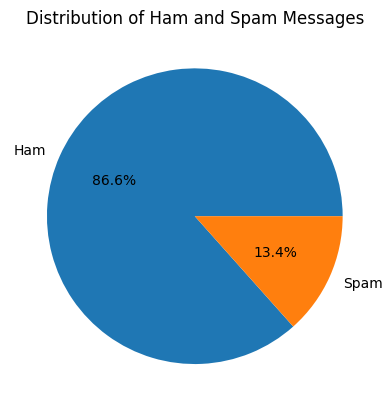

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each v1
v1_counts = df['v1'].value_counts()

# Create a pie chart
plt.pie(v1_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%')

# Set the title and display the plot
plt.title('Distribution of Ham and Spam v2s')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk  # Import the NLTK library

def count_words_sentences(text):
  """Counts the number of words and sentences in a given text.

  Args:
    text: The text to analyze.

  Returns:
    A tuple containing the number of words and sentences.
  """

  # Tokenize the text into words
  words = nltk.word_tokenize(text)

  # Tokenize the text into sentences
  sentences = nltk.sent_tokenize(text)

  # Return the number of words and sentences
  return len(words), len(sentences)

# Apply the function to the 'v2' column of the DataFrame
word_counts, sentence_counts = zip(*df['v2'].apply(count_words_sentences))

# Create new columns in the DataFrame to store the counts
df['Word_Count'] = word_counts
df['Sentence_Count'] = sentence_counts

In [ ]:
# Calculate the number of characters in each v2
df['Character_Count'] = df['v2'].apply(lambda x: len(x))

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Word_Count,Sentence_Count,Character_Count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,24,2,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,37,2,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,15,1,61


In [ ]:
df.describe()

,v1,Word_Count,Sentence_Count,Character_Count
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,18.699390,1.996411,80.118808
std,0.340751,13.741932,1.520159,59.690841
min,0.000000,1.000000,1.000000,2.000000
25%,0.000000,9.000000,1.000000,36.000000
50%,0.000000,15.000000,1.500000,61.000000
75%,0.000000,27.000000,2.000000,121.000000
max,1.000000,220.000000,38.000000,910.000000


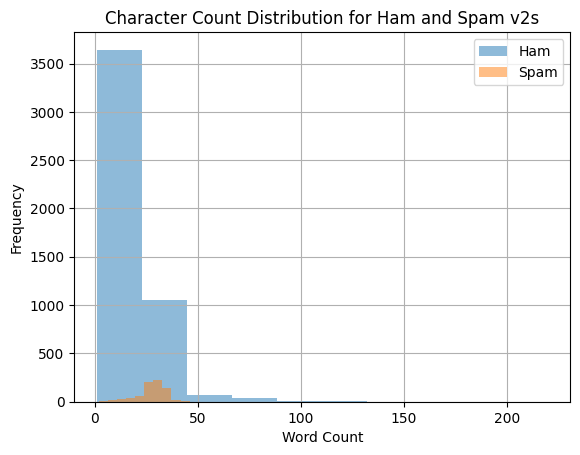

<Figure size 100000x100000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram plot for character count for ham and spam separately
df.groupby('v1')['Word_Count'].hist(alpha=0.5)

# Set the title and labels
plt.title('Character Count Distribution for Ham and Spam v2s')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Add a legend
plt.legend(['Ham', 'Spam'])
plt.figure(figsize=(1000,1000))
# Show the plot
plt.show()

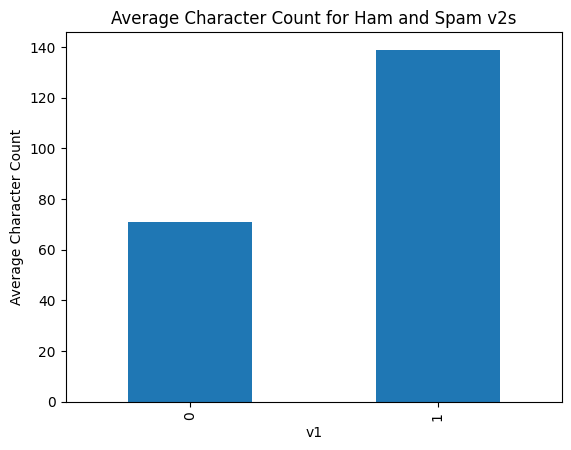

In [ ]:
import matplotlib.pyplot as plt

# Create a bar graph for character count for ham and spam separately
df. groupby('v1')['Character_Count'].mean().plot(kind='bar')

# Set the title and labels
plt.title('Average Character Count for Ham and Spam v2s')
plt.xlabel('v1')
plt.ylabel('Average Character Count')

# Show the plot
plt.show()

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text
preprocess_text("my nMae is krish vaShistha")

'nmae krish vashistha'

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Word_Count,Sentence_Count,Character_Count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,24,2,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,37,2,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,15,1,61


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/spam (1).csv', encoding='latin-1')

# Preprocess the text in the 'v2' column
df['v2'] = df['v2'].apply(preprocess_text)

# Print the updated DataFrame
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  go jurong point crazi avail bugi n great world...        NaN   
1      ham                              ok lar joke wif u oni        NaN   
2     spam  free entri 2 wkli comp win fa cup final tkt 21...        NaN   
3      ham                u dun say earli hor u c alreadi say        NaN   
4      ham          nah dont think goe usf live around though        NaN   
...    ...                                                ...        ...   
5567  spam  2nd time tri 2 contact u u å750 pound prize 2 ...        NaN   
5568   ham                           ì_ b go esplanad fr home        NaN   
5569   ham                            piti mood soani suggest        NaN   
5570   ham  guy bitch act like id interest buy someth els ...        NaN   
5571   ham                                     rofl true name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go jurong point crazi avail bugi n great world...,NaN,NaN,NaN
1,ham,ok lar joke wif u oni,NaN,NaN,NaN
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,NaN,NaN,NaN
3,ham,u dun say earli hor u c alreadi say,NaN,NaN,NaN
4,ham,nah dont think goe usf live around though,NaN,NaN,NaN


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

# Vectorize the v2s
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['v2'])

# Vectorize the categories
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['v1'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

# Create a MultinomialNB model
model = MultinomialNB()

# Train the model
model.fit(X, y)

# Evaluate the model
score = model.score(X_test, Y_test)
print('Accuracy:', score)


Accuracy: 0.9937219730941704


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, model.predict(X_test))

# Calculate precision
precision = precision_score(Y_test, model.predict(X_test))

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)

Accuracy: 0.9937219730941704
Precision: 0.9870967741935484
